# Loading the data

In [1]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.cloud import bigquery     # If you are working locally, make sure you have Google Cloud library installed
import pandas as pd
from google.oauth2 import service_account


import pyarrow.parquet as pq

In [3]:
# Connect to BQ


credentials = service_account.Credentials.from_service_account_file(
'/Users/mariegeorgescudehillerin/Desktop/Le Wagon/Project/music-recommendation-system-24-e7b0bc87bbb3.json')
# music-recommendation-system-24-3d0d21fb1f8b.json is the service account JSON file. Save the file locally on your device and add the path here.
# make sure that the slashes in the path are '/' and not '\'


project_id = 'music-recommendation-system-24'
client = bigquery.Client(credentials= credentials,project=project_id)

In [4]:
# Query BQ


query_job = client.query("""
  SELECT
     *
  FROM `music-recommendation-system-24.obama_playlists.BO_playlist_2019_2024_artist_enriched`
  LIMIT 1000""")
#but the query in three quote marks




results = query_job.result() # Wait for the job to complete.


rows = [dict(row) for row in results]


# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(rows)

#Data Exploration

In [5]:
df.shape

(259, 27)

In [6]:
print(df.columns)

Index(['track_id', 'track_name', 'track_album_name', 'track_artist',
       'artist_gender', 'track_album_release_year', 'duration_min',
       'track_popularity', 'genres', 'record_label', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'Playlist_year', 'artist_id', 'artist_name', 'artist_followers',
       'artist_popularity'],
      dtype='object')


In [7]:
pd.DataFrame(df.columns, columns=["Column Names"])

,Column Names
0,track_id
1,track_name
2,track_album_name
3,track_artist
4,artist_gender
5,track_album_release_year
6,duration_min
7,track_popularity
8,genres
9,record_label


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  259 non-null    object 
 1   track_name                259 non-null    object 
 2   track_album_name          259 non-null    object 
 3   track_artist              259 non-null    object 
 4   artist_gender             259 non-null    object 
 5   track_album_release_year  259 non-null    object 
 6   duration_min              259 non-null    float64
 7   track_popularity          259 non-null    int64  
 8   genres                    259 non-null    object 
 9   record_label              259 non-null    object 
 10  danceability              259 non-null    float64
 11  energy                    259 non-null    float64
 12  key                       259 non-null    object 
 13  loudness                  259 non-null    float64
 14  mode      

In [9]:
df.head()

,track_id,track_name,track_album_name,track_artist,artist_gender,track_album_release_year,duration_min,track_popularity,genres,record_label,...,instrumentalness,liveness,valence,tempo,time_signature,Playlist_year,artist_id,artist_name,artist_followers,artist_popularity
0,7qEKZP3nOqWpEQlANPccOx,Espera,Esperanza,Esperanza Spalding,F,2 008,4.64,29,Jazz,Heads Up,...,3.0,11.0,21.0,152,1,2019,[5bepW5vcdRzheNc0F8lHJ5],[Esperanza Spalding],[399132],[49]
1,68vxG1i6RSmrsY9mRdqDgG,Burning,Heard It In A Past Life,Maggie Rogers,F,2 019,3.55,53,Indie,Capitol Records,...,0.0,11.0,28.0,110,4,2019,[4NZvixzsSefsNiIqXn0NDe],[Maggie Rogers],[1166373],[72]
2,3buy5Ooz6uNL48W1yBUzbM,Seventeen,Seventeen,Sharon Van Etten,F,2 019,4.43,0,Indie,Jagjaguwar,...,21.0,7.0,24.0,127,4,2019,[2wJ4vsxWd7df7dRU4KcoDe],[Sharon Van Etten],[541804],[56]
3,6Vmow8PuUaU7W1T2WWLZk2,Go Gina,Ctrl,SZA,F,2 017,2.69,61,Hip Hop,Top Dawg Entertainment/RCA Records,...,0.0,39.0,46.0,80,4,2019,[7tYKF4w9nC0nq9CsPZTHyP],[SZA],[24229902],[90]
4,0k664IuFwVP557Gnx7RhIl,Juice,Cuz I Love You,Lizzo,F,2 019,3.25,66,Hip Hop,Nice Life/Atlantic,...,0.0,40.0,84.0,120,4,2019,[56oDRnqbIiwx4mymNEv7dS],[Lizzo],[5714695],[70]


#Data cleaning

In [12]:
df.shape

(259, 27)

In [14]:
df.isnull().sum()

track_id                    0
track_name                  0
track_album_name            0
track_artist                0
artist_gender               0
track_album_release_year    0
duration_min                0
track_popularity            0
genres                      0
record_label                0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
time_signature              0
Playlist_year               0
artist_id                   0
artist_name                 0
artist_followers            0
artist_popularity           0
dtype: int64

In [35]:
df['track_album_release_year'] = df['track_album_release_year'].str.replace(r'\D', '', regex=True).astype("Int64")


In [36]:
df['decade'] = (df['track_album_release_year'] // 10) * 10


#Obama´s Taste Exploration

#Data visualization

In [15]:
sorted_counts = df["genres"].value_counts().sort_values(ascending=False)
sorted_genres = sorted_counts.index.tolist()

fig = px.bar(df, x="genres", title="genres Count",
             category_orders={"genres": sorted_genres})
fig.show()

##Artists

In [16]:
grouped_by_artist = df.groupby("track_artist").count()
grouped_by_artist.sort_values("track_name", ascending=False).head(20)

,track_id,track_name,track_album_name,artist_gender,track_album_release_year,duration_min,track_popularity,genres,record_label,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,Playlist_year,artist_id,artist_name,artist_followers,artist_popularity
track_artist,,,,,,,,,,,,,,,,,,,,,
Bob Dylan,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Stevie Wonder,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
The Rolling Stones,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Beyoncé,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Bob Marley & The Wailers,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Otis Redding,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Maggie Rogers,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
SZA,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
H.E.R.,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


##Release Year

In [37]:
grouped_by_year = df.groupby("track_album_release_year").count()
grouped_by_year.sort_values("track_name", ascending=False).head(5)

,track_id,track_name,track_album_name,track_artist,artist_gender,duration_min,track_popularity,genres,record_label,danceability,...,liveness,valence,tempo,time_signature,Playlist_year,artist_id,artist_name,artist_followers,artist_popularity,decade
track_album_release_year,,,,,,,,,,,,,,,,,,,,,
2020,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
2019,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
2023,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
2022,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
2024,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18


Which music era does Obama prefer?

In [39]:
grouped_by_decade = df.groupby("decade").count()
grouped_by_decade.sort_values("track_name", ascending=False).head(5)

,track_id,track_name,track_album_name,track_artist,artist_gender,track_album_release_year,duration_min,track_popularity,genres,record_label,...,instrumentalness,liveness,valence,tempo,time_signature,Playlist_year,artist_id,artist_name,artist_followers,artist_popularity
decade,,,,,,,,,,,,,,,,,,,,,
2020,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
2010,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1970,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
1960,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2000,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21


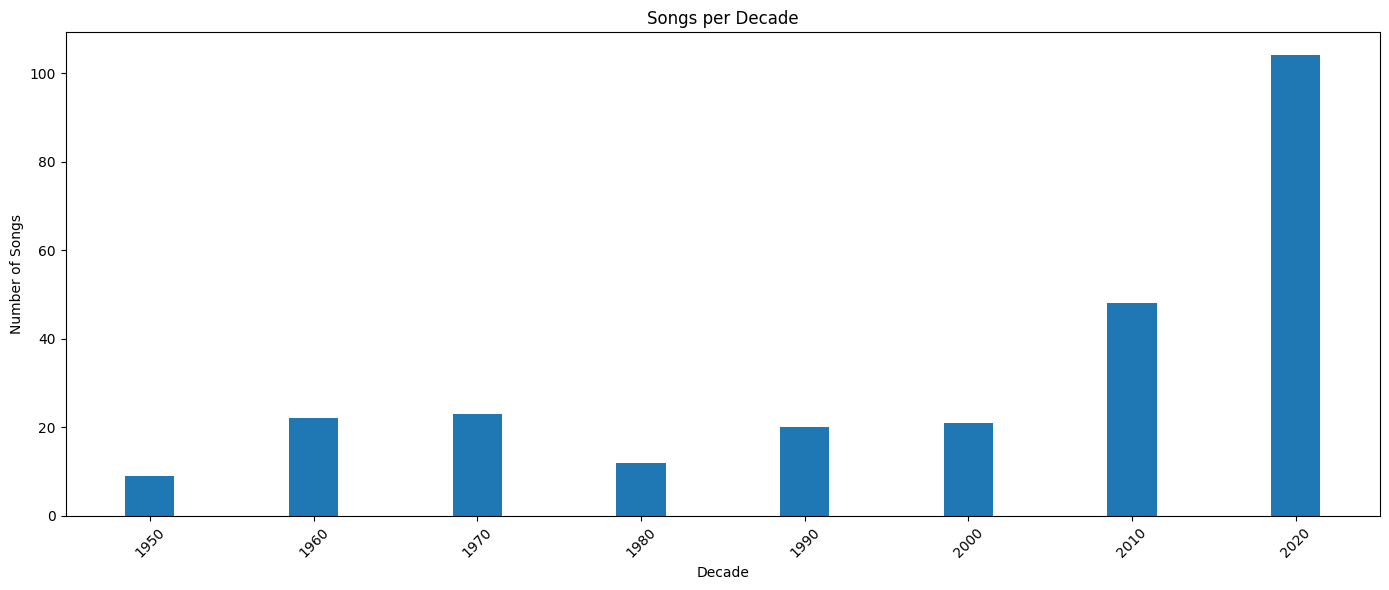

In [42]:
plt.figure(figsize=(14, 6))
bar_width = 3

plt.bar(grouped_by_decade.index, grouped_by_decade['track_name'], width=bar_width)

plt.xticks(
    ticks=grouped_by_decade.index,
    labels=grouped_by_decade.index,
    rotation=45,
)

plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.title('Songs per Decade')

plt.tight_layout()  # Prevent label overlap
plt.show()


In [43]:
print(df["track_album_release_year"].min())

1954


In [44]:
print(df["track_album_release_year"].max())

2024


##Popularity analysis

In [68]:
print(df['artist_popularity'].dtype)
print(df['artist_popularity'].head())

object
0    [49]
1    [72]
2    [56]
3    [90]
4    [70]
Name: artist_popularity, dtype: object


In [69]:
non_numeric = df[~df['artist_popularity'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric)

                   track_id                          track_name  \
0    7qEKZP3nOqWpEQlANPccOx                              Espera   
1    68vxG1i6RSmrsY9mRdqDgG                             Burning   
2    3buy5Ooz6uNL48W1yBUzbM                           Seventeen   
3    6Vmow8PuUaU7W1T2WWLZk2                             Go Gina   
4    0k664IuFwVP557Gnx7RhIl                               Juice   
..                      ...                                 ...   
254  26q6YTrXt9l8qshIveiTX9    Rebirth Of Slick (Cool Like Dat)   
255  6MdqqkQ8sSC0WB4i8PyRuQ                          No Diggity   
256  1eDI5oU04SLsXl0TfxfwYf                        Love Me JeJe   
257  3Zm9ZCH5iQcpp1tdvU9rb7                             BAD BOY   
258  5Xhqe9xu6bKRSqLj1mS1SB  If You Love Somebody Set Them Free   

                                  track_album_name  \
0                                        Esperanza   
1                          Heard It In A Past Life   
2                                

In [ ]:
artist_popularity = df.groupby("track_artist")["artist_popularity"].mean()
artist_popularity.sort_values(ascending=False).head(20)

In [ ]:
artist_followers = df.groupby("track_artist")["artist_followers"].mean()
artist_followers.sort_values(ascending=False).head(20)

In [70]:
track_popularity = df.groupby("track_name")["track_popularity"].mean()
track_popularity.sort_values(ascending=False).head(20)

track_name
MILLION DOLLAR BABY                             90.0
Stargazing                                      89.0
CHIHIRO                                         88.0
A Bar Song (Tipsy)                              88.0
PERRO NEGRO                                     85.0
Snooze                                          85.0
i like the way you kiss me                      85.0
Best Part (feat. H.E.R.)                        84.0
Brown Eyed Girl                                 83.0
Dancing In the Dark                             82.0
Fast Car                                        82.0
La Bebe - Remix                                 81.0
Ojitos Lindos                                   81.0
Could You Be Loved                              80.0
365                                             80.0
Lil Boo Thang                                   79.0
California Love - Original Version              79.0
(Sittin' On) the Dock of the Bay                78.0
Work                               

In [47]:
print("Average Track Popularity: ", track_popularity.mean())
print("Median Track Popularity: ", track_popularity.median())
print("Max Track Popularity: ", track_popularity.max())
print("Min Track Popularity: ", track_popularity.min())

Average Track Popularity:  47.31782945736434
Median Track Popularity:  50.0
Max Track Popularity:  90.0
Min Track Popularity:  0.0


In [ ]:
print("Average Artist Popularity: ", artist_popularity.mean())
print("Median Artist Popularity: ", artist_popularity.median())
print("Max Artist Popularity: ", artist_popularity.max())
print("Min Artist Popularity: ", artist_popularity.min())

In [ ]:
# Set up the figure for Artist Popularity with two subplots (barplot and scatterplot) side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))

# Bar Plot on the first subplot
ax1.bar(artist_popularity, artist_popularity, color='#1f77b4')
ax1.axhline(y=artist_popularity.mean(), color='red', linestyle='--', label='Average Popularity')
ax1.set_xlabel('Artist')
ax1.set_ylabel('Popularity')
ax1.set_title('Artist Popularity')
ax1.legend()

# Scatter Plot on the second subplot
ax2.scatter(range(len(artist_popularity)), artist_popularity, color='skyblue')
ax2.axhline(y=artist_popularity.mean(), color='red', linestyle='--', label='Average Popularity')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Popularity')
ax2.set_title('Artist Popularity')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

##Track Duration

Does Obama prefer short or long songs?

In [60]:
print("The average duration for a song in Obama's playlists is",df["duration_min"].mean(),"minutes.")
print("The median duration for a song in Obama's playlists is",df["duration_min"].median(),"minutes.")
print("The standard deviation for a song in Obama's playlists is",df["duration_min"].std(),"minutes.")
print("The shortest song in Obama's playlists is",df["duration_min"].min(),"minutes.")
print("The longest song in Obama's playlists is",df["duration_min"].max(),"minutes.")

The average duration for a song in Obama's playlists is 3.8449806949806953 minutes.
The median duration for a song in Obama's playlists is 3.67 minutes.
The standard deviation for a song in Obama's playlists is 1.2594530542064293 minutes.
The shortest song in Obama's playlists is 1.28 minutes.
The longest song in Obama's playlists is 13.45 minutes.


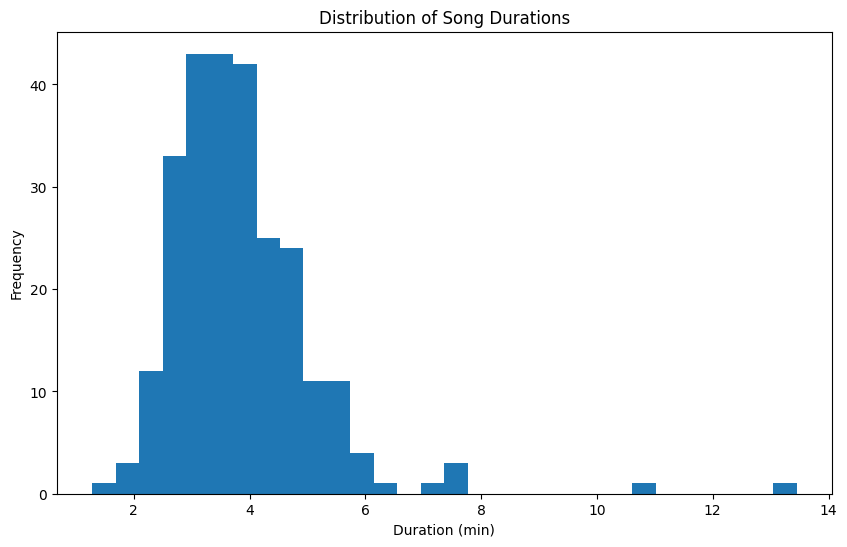

In [58]:
#histogram of duration of songs
plt.figure(figsize=(10, 6))
plt.hist(df['duration_min'], bins=30, color='#1f77b4')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Durations')
plt.show()

##Music Features

In [61]:
print(df["danceability"].mean())

64.27953667953669


In [62]:
print(df["loudness"].mean())

-8.332393822393822


In [63]:
print(df["valence"].mean())

56.48440154440154


In [64]:
print(df["time_signature"].value_counts())

time_signature
4    230
3     25
1      3
5      1
Name: count, dtype: int64


In [65]:
print(df["mode"].value_counts())

mode
Major    154
minor     92
Minor     13
Name: count, dtype: int64


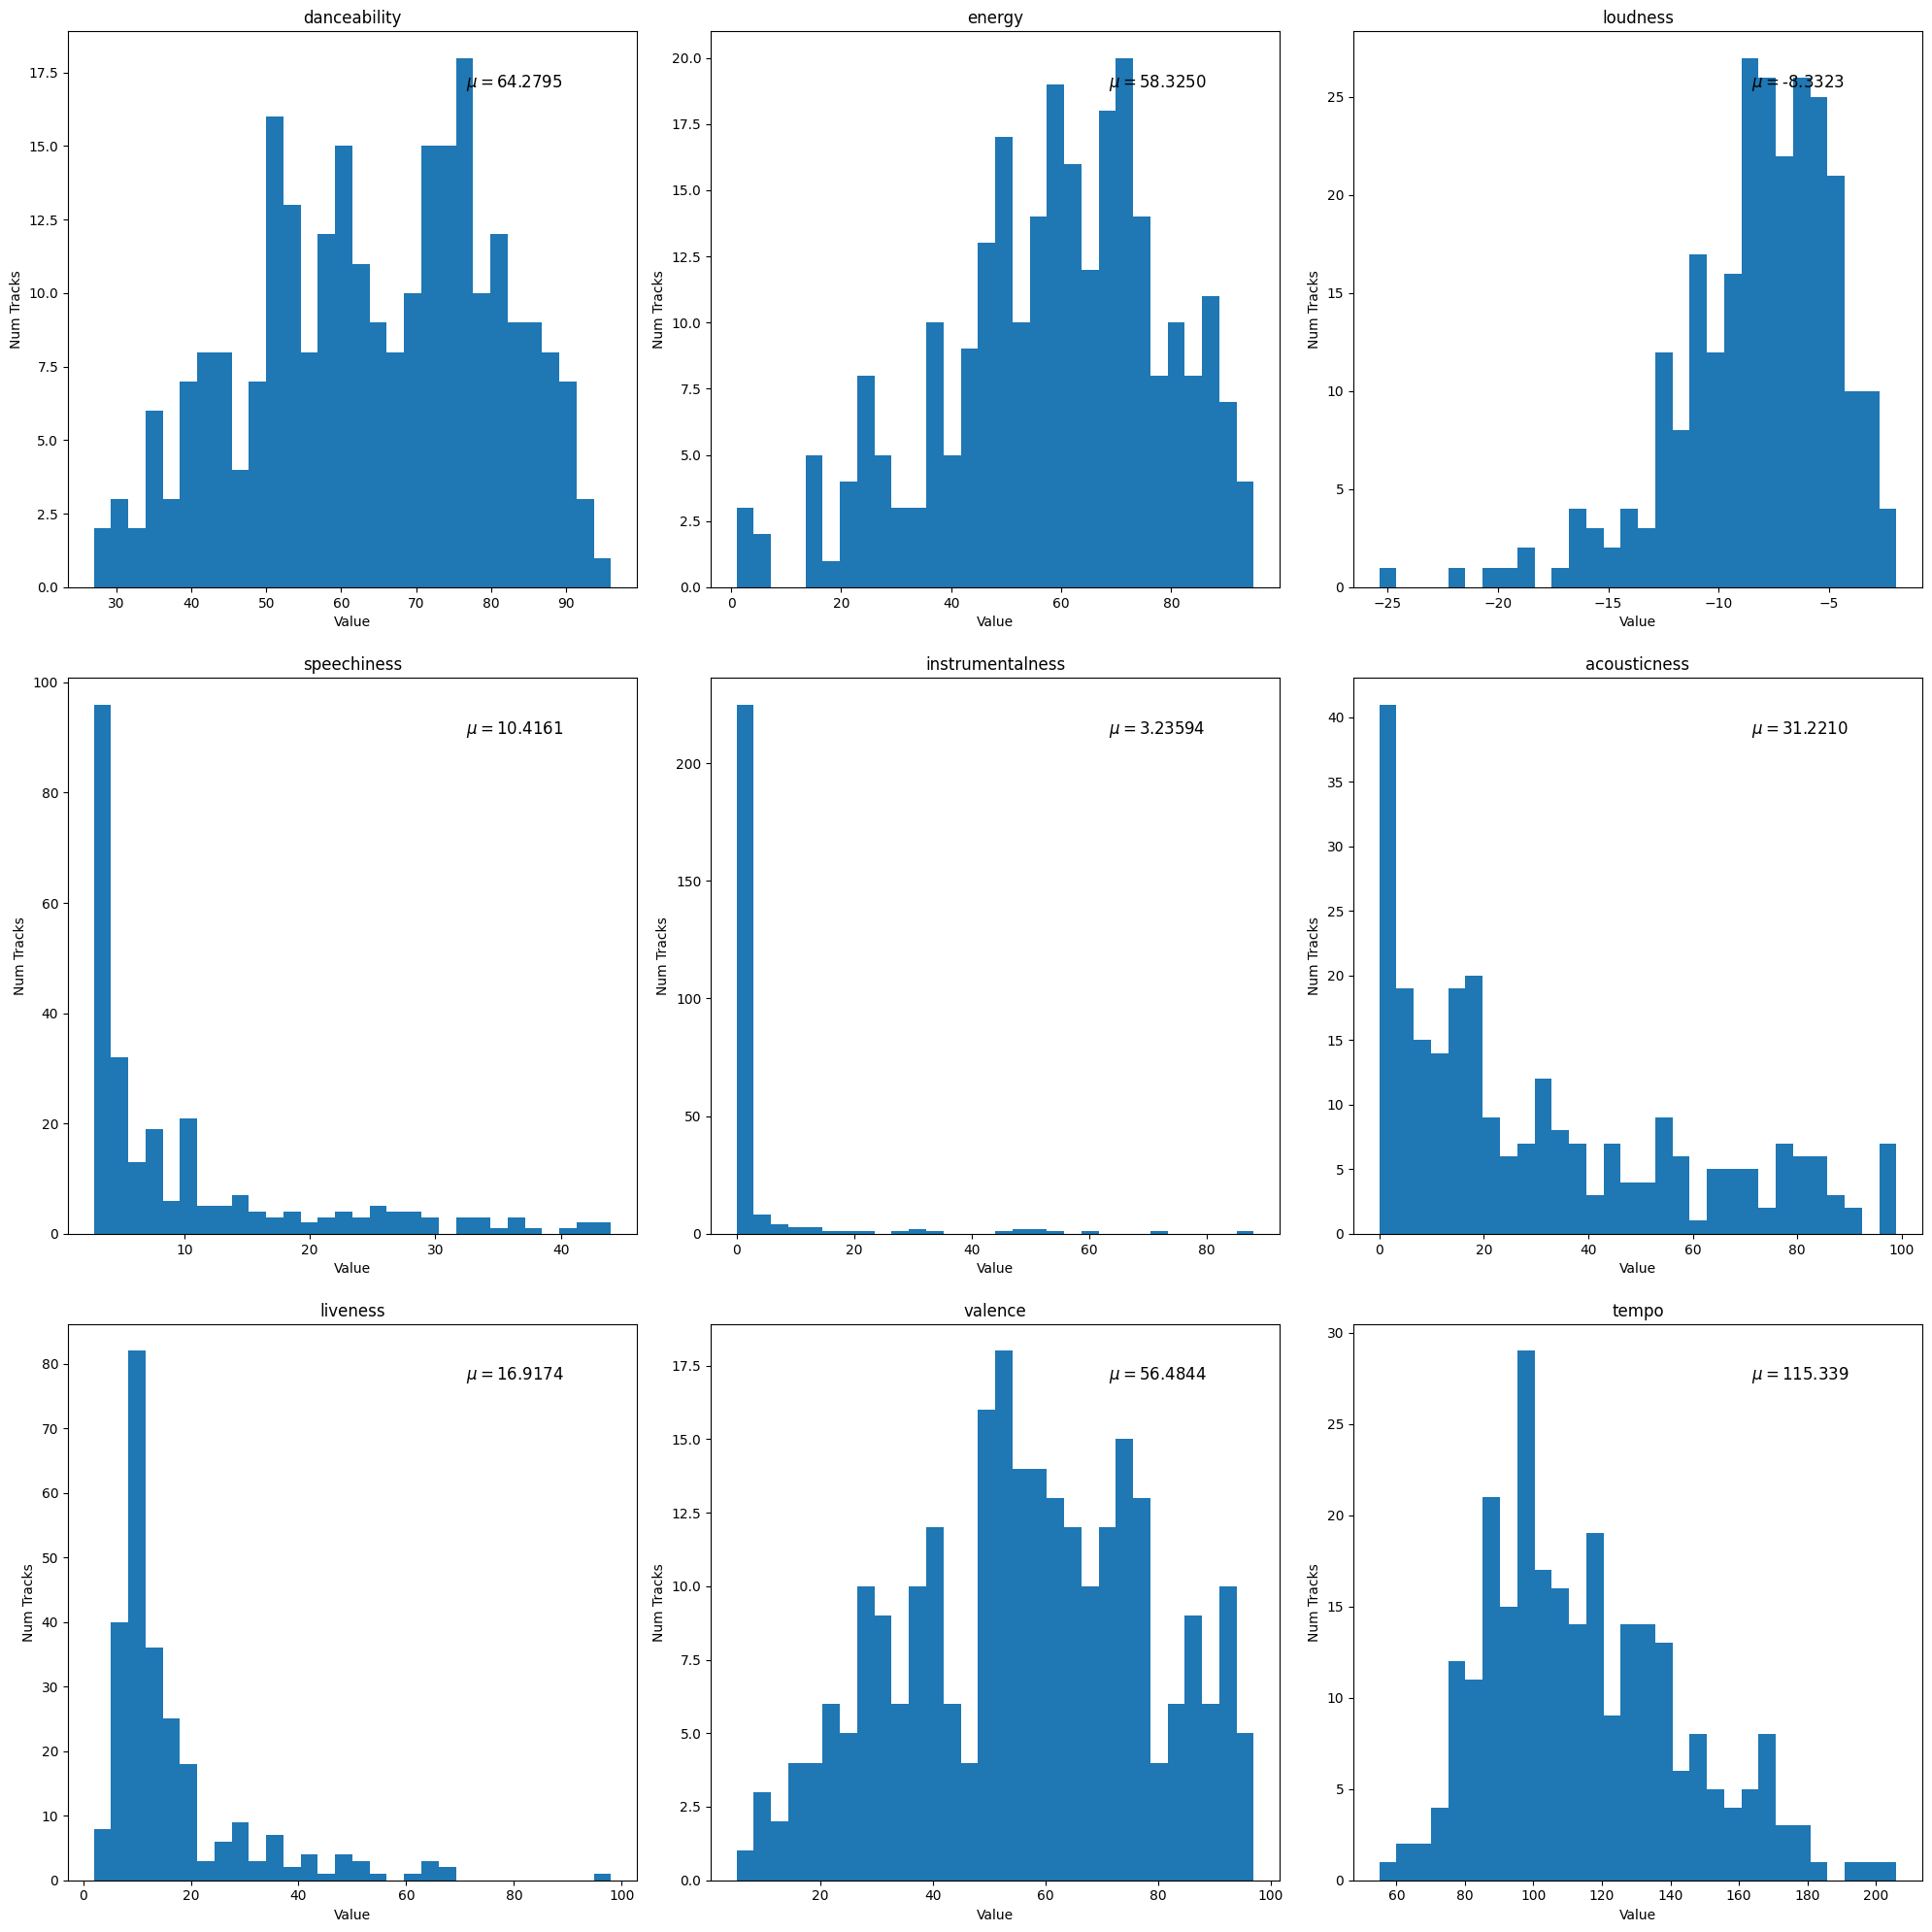

In [66]:
plt.figure(figsize=(20,20))

for i,category in enumerate(['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo']):
    plt.subplot(3, 3, i+1)
    plt.hist(df[category], bins=30)
    plt.text(plt.xlim()[1] - (plt.xlim()[1] - plt.xlim()[0])*0.3,
                plt.ylim()[1]*0.9, r'$\mu=$'+str(df[category].mean())[:7], fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Num Tracks')
    plt.title(category)

plt.tight_layout(h_pad=2)

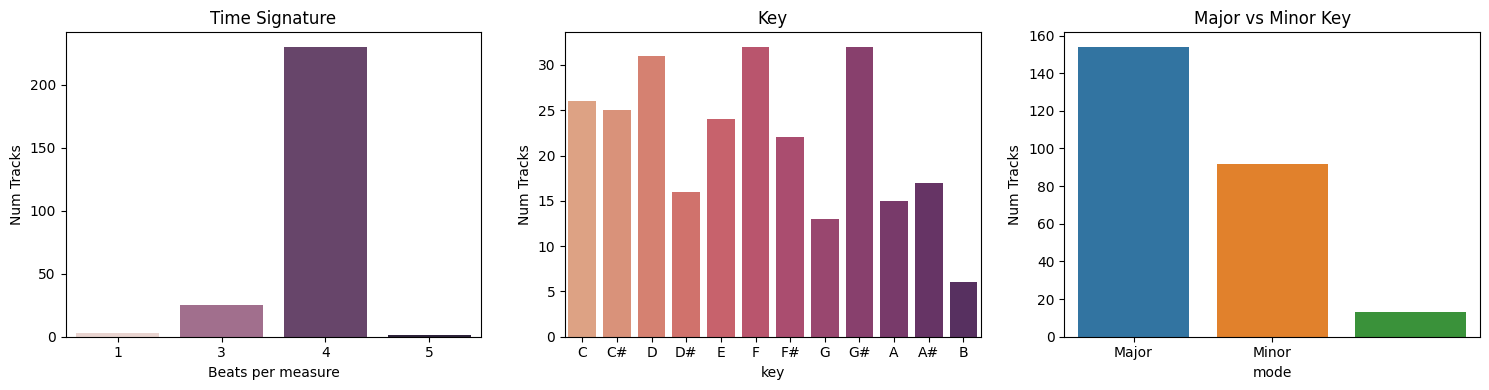

In [67]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(df, x='time_signature', hue='time_signature', legend=False)
plt.xlabel('Beats per measure')
plt.ylabel('Num Tracks')
plt.title('Time Signature')

plt.subplot(1, 3, 2)
sns.countplot(df, x='key', hue='key', palette='flare', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.ylabel('Num Tracks')
plt.title('Key')

plt.subplot(1, 3, 3)
sns.countplot(df, x='mode', hue='mode', legend=False)
plt.xticks(ticks=[0, 1], labels=['Major', 'Minor'])  # Set ticks to match labels
plt.ylabel('Num Tracks')
plt.title('Major vs Minor Key')

plt.tight_layout(w_pad=2)

the vast majority of the tracks are in 4/4 time signature but interestingly enough the majority of the tracks are in G major, A major and D minor. About 2/3 of the tracks are in minor key. Maybe this is the reason for a relatively balanced valence of 0,56? Tracks in B major are obviously not very attractive to Obama.
